Use only the yellow points for forming the yellow black line

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def find_yellow_line(image_path):
    """Find and draw a straight line representing yellow tape on the surface."""
    image = cv2.imread(image_path)
    if image is None:
        print("Error loading image")
        return None, None
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define HSV range for yellow and create a mask
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find points in the mask
    points = np.column_stack(np.where(mask.transpose() > 0))
    
    # Fit a line to these points
    processed_image = image.copy()
    if len(points) > 0:
        [vx, vy, x, y] = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)
        lefty = int((-x*vy/vx) + y)
        righty = int(((processed_image.shape[1]-x)*vy/vx)+y)
        cv2.line(processed_image, (processed_image.shape[1]-1,righty), (0,lefty), (0,255,0), 2)

    return image, mask, processed_image


def process_image(path):
    image, mask, processed_image = find_yellow_line(path)

    # Check if the images were loaded properly
    if image is not None and processed_image is not None and mask is not None:
        # Convert mask to color to match dimensionality for display
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

        # Display the results
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(mask_color, cv2.COLOR_BGR2RGB))
        plt.title('Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Line')
        plt.axis('off')

        plt.show()
    else:
        print("Failed to process the image.")


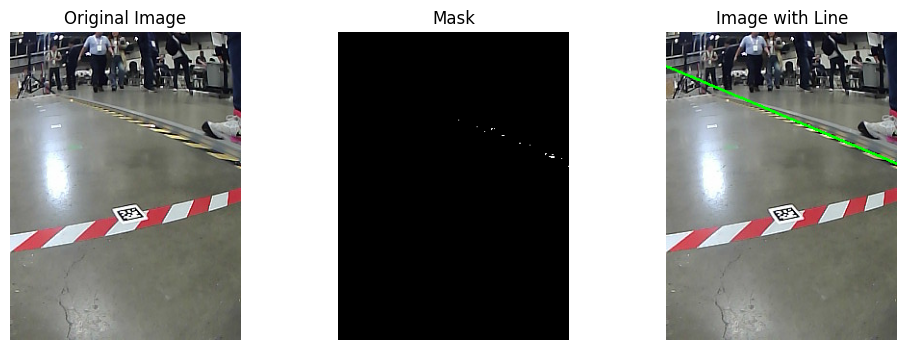

In [4]:
# Load and process the image
path = 'dataset/may14_run00/frame_1580.png'

process_image(path)

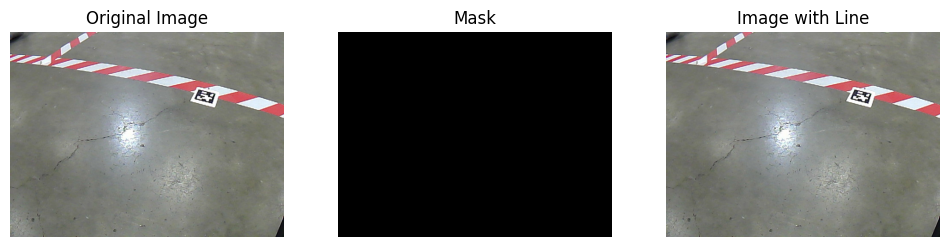

In [5]:
# Load and process the image
path = 'dataset/may15_run00_cam08/frame_760.png'

process_image(path)

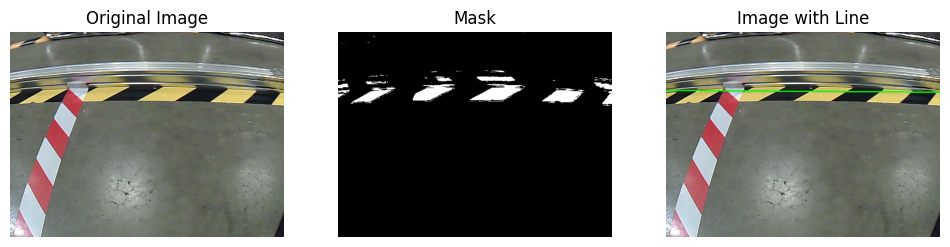

In [6]:
# Load and process the image
path = 'dataset/may15_run00_cam08/frame_940.png'

process_image(path)